In [1]:
#auth: Abigail Asamoah
#date: 2021-07-04

In [30]:

#imports
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 


In [31]:
# read the file and output resuls in a dataframe
df =pd.read_csv("income.csv")
df

,Name,Age,Income
0,Ama,27,70000
1,Kofi,29,90000
2,Kojo,29,61000
3,Kwesi,28,60000
4,Yaw,42,150000


Text(0, 0.5, 'Income ($)')

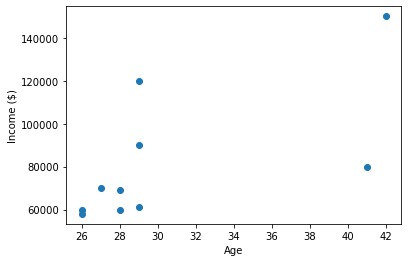

In [16]:
# using matplotlib to visualize data
plt.scatter(df.Age, df['Income'])
plt.xlabel('Age')
plt.ylabel('Income ($)')

In [32]:
#trying to predict how many clusters we can have
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income']])
y_predicted

array([0, 2, 0, 0, 1], dtype=int32)

In [33]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income,cluster
0,Ama,27,70000,0
1,Kofi,29,90000,2
2,Kojo,29,61000,0
3,Kwesi,28,60000,0
4,Yaw,42,150000,1


In [34]:
# checking the center of  clusters
km.cluster_centers_

array([[2.80000000e+01, 6.36666667e+04],
       [4.20000000e+01, 1.50000000e+05],
       [2.90000000e+01, 9.00000000e+04]])

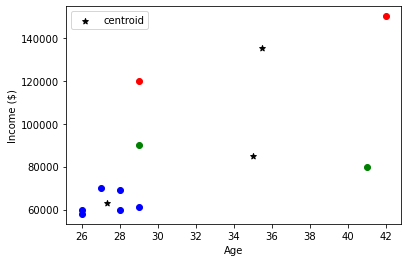

In [23]:
#plot the clusters using a graph 
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income'], color= 'green')
plt.scatter(df2.Age, df2['Income'], color= 'red')
plt.scatter(df3.Age, df3['Income'], color= 'blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker ='*', label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [35]:
#the different measuremnt for age and income is affecting the centroid so we will use the minmax scaler to resolve this to make the age and income as a standardized feature
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income,cluster
0,Ama,0.000000,0.111111,0
1,Kofi,0.133333,0.333333,2
2,Kojo,0.133333,0.011111,0
3,Kwesi,0.066667,0.000000,0
4,Yaw,1.000000,1.000000,1


In [36]:
# checking the center of  clusters again and make prediction again
km.cluster_centers_

array([[2.80000000e+01, 6.36666667e+04],
       [4.20000000e+01, 1.50000000e+05],
       [2.90000000e+01, 9.00000000e+04]])

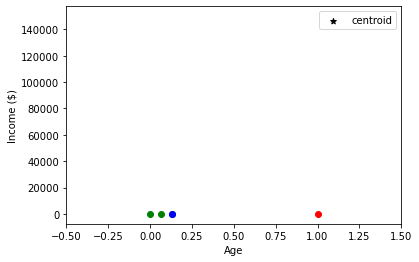

In [38]:
#plot the clusters using a graph 
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income'], color= 'green')
plt.scatter(df2.Age, df2['Income'], color= 'red')
plt.scatter(df3.Age, df3['Income'], color= 'blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker ='*', label = 'centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.xlim(-.5, 1.5)
plt.legend()

In [41]:
#using the elbow plot
sse =[]
k_rng = range(1,16)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

ValueError: n_samples=5 should be >= n_clusters=6.